<a href="https://colab.research.google.com/github/datagrad/Quantium-Internship/blob/main/QVI_Task_1_Kamal_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkred"><u><center> **Quantium Retail Analysis**


# QVI_Task 1
We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.

# **Insights:**
  - There are difference in segmentwise total sales and average sales.If we focus on segments which have high avg sales but comparatively less total sales then there are possibilities to increase profit.
    - There are so many brands which have opportunity to increase sales. As per avg sale after kettle and doritos there are 6 brands from cheezles to cobs in avg sales graph need focus to increase sales.

    - prod_qty 2 has highest total sales but 5 has higest avg sale. need to focus on total sale and avg sale simultaneoulsy. There are possiblities for category 4 to get high total sale as well as high avg sale. 

    - Midage singles/Couples and New families have high average sale after two high categories but don't have high total sales comapratively. So need to focus in these two groups to increase total sales also with avg sale.
  - Top 3 total sales contributor segment are
    - Older families (Budget) \$156,864
    - Young Singles/Couples (Mainstream) \$147,582
    - Retirees (Mainstream) \$145,169
  - Young Singles/Couples (Mainstream) has the highest population, followed by Retirees (Mainstream). Which explains their high total sales.

  - Despite Older Families not having the highest population, they have the highest frequency of purchase, which contributes to their high total sales.
  - Older Families followed by Young Families has the highest average quantity of chips bought per purchase.
  - The Mainstream category of the "Young and Midage Singles/Couples" have the highest spending of chips per purchase. And the difference to the non-Mainstream "Young and Midage Singles/Couples" are statistically significant.
  - Chips brand Kettle is dominating every segment as the most purchased brand.
  - Observing the 2nd most purchased brand, "Young and Midage Singles/Couples" is the only segment with a different preference (Doritos) as compared to others' (Smiths).
  - Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments.

# **Reccomendations:**
- Older Families:
  - Focus on the Budget segment.
  - Strength: Frequent purchase. We can give promotions that encourages more frequency of purchase.
  - Strength: High quantity of chips purchased per visit. We can give promotions that encourage them to buy more quantity of chips per purchase.
- Young Singles/Couples:
  - Focus on the Mainstream segment.
  - This segment is the only segment that had Doritos as their 2nd most purchased brand (after Kettle). To specifically target this segment it might be a good idea to collaborate with Doritos merchant to do some branding promotion catered to "Young Singles/Couples - Mainstream" segment.
  - Strength: Population quantity. We can spend more effort on making sure our promotions reach them, and it reaches them frequently.
- Retirees:
  - Focus on the Mainstream segment.
  - Strength: Population quantity. Again, since their population quantity is the contributor to the high total sales, we should spend more effort on making sure our promotions reaches as many of them as possible and frequent.
- General:
  - All segments has Kettle as the most frequently purchased brand, and 175gr (regardless of brand) followed by 150gr as the preferred chip size.
  - When promoting chips in general to all segments it is good to take advantage of these two points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
plt.rcParams['figure.figsize'] = (13.0, 6.0)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/datagrad/Quantium-Internship/main/QVI_purchase_behaviour.csv")

df2 = pd.read_excel("https://raw.githubusercontent.com/datagrad/Quantium-Internship/main/QVI_transaction_data.xlsx")


In [3]:
df1.head()

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream

In [4]:
df2.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8

In [5]:
df1.shape
df2.shape

(72637, 3)

(264836, 8)

In [6]:
df1.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [7]:
df2.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
df1.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [9]:
df2.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [10]:
df1.duplicated().sum()

0

In [11]:
df2.duplicated().sum()

1

In [12]:
df2.drop_duplicates(inplace=True, ignore_index=True) #deleting single duplicate value

In [13]:
df2.shape

(264835, 8)

In [14]:
mdf = pd.merge(df1, df2, on="LYLTY_CARD_NBR", how="right")

In [15]:
mdf.head()

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER   DATE  STORE_NBR  \
0            1000   YOUNG SINGLES/COUPLES          Premium  43390          1   
1            1307  MIDAGE SINGLES/COUPLES           Budget  43599          1   
2            1307  MIDAGE SINGLES/COUPLES           Budget  43414          1   
3            1307  MIDAGE SINGLES/COUPLES           Budget  43533          1   
4            1343  MIDAGE SINGLES/COUPLES           Budget  43605          1   

   TXN_ID  PROD_NBR                               PROD_NAME  PROD_QTY  \
0       1         5  Natural Chip        Compny SeaSalt175g         2   
1     348        66                CCs Nacho Cheese    175g         3   
2     346        96          WW Original Stacked Chips 160g         2   
3     347        54                       CCs Original 175g         1   
4     383        61  Smiths Crinkle Cut  Chips Chicken 170g         2   

   TOT_SALES  
0        6.0  
1        6.3  
2        3.8  
3        2.1  
4        2.9

In [16]:
mdf.shape

(264835, 10)

In [17]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264834
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264835 non-null  int64  
 1   LIFESTAGE         264835 non-null  object 
 2   PREMIUM_CUSTOMER  264835 non-null  object 
 3   DATE              264835 non-null  int64  
 4   STORE_NBR         264835 non-null  int64  
 5   TXN_ID            264835 non-null  int64  
 6   PROD_NBR          264835 non-null  int64  
 7   PROD_NAME         264835 non-null  object 
 8   PROD_QTY          264835 non-null  int64  
 9   TOT_SALES         264835 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


# **Convert DATE column to a date format**

In [18]:
from datetime import date, timedelta
start = date(1899,12,30) #A quick search online tells us that CSV and Excel integer dates begin on 30 Dec 1899

new_date_format = []

for date in mdf["DATE"]:
    delta = timedelta(date)
    new_date_format.append(start + delta)

In [19]:
mdf["DATE"] = pd.to_datetime(pd.Series(new_date_format))

In [20]:
mdf.head()

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER       DATE  \
0            1000   YOUNG SINGLES/COUPLES          Premium 2018-10-17   
1            1307  MIDAGE SINGLES/COUPLES           Budget 2019-05-14   
2            1307  MIDAGE SINGLES/COUPLES           Budget 2018-11-10   
3            1307  MIDAGE SINGLES/COUPLES           Budget 2019-03-09   
4            1343  MIDAGE SINGLES/COUPLES           Budget 2019-05-20   

   STORE_NBR  TXN_ID  PROD_NBR                               PROD_NAME  \
0          1       1         5  Natural Chip        Compny SeaSalt175g   
1          1     348        66                CCs Nacho Cheese    175g   
2          1     346        96          WW Original Stacked Chips 160g   
3          1     347        54                       CCs Original 175g   
4          1     383        61  Smiths Crinkle Cut  Chips Chicken 170g   

   PROD_QTY  TOT_SALES  
0         2        6.0  
1         3        6.3  
2         2        3.8  
3         1        2.1  
4         2        2.9

In [21]:
mdf["DATE"].dtype

dtype('<M8[ns]')

# **looking at the right products by examining PROD_NAME**

In [22]:
mdf["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g', 'WW Original Stacked Chips 160g',
       'CCs Original 175g', 'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Tyrrells Crisps     Lightly Salted 165g',
       'Kettle Tortilla ChpsFeta&Garlic 150g',
       'Dorito Corn Chp     Supreme 380g', 'Doritos Mexicana    170g',
       'Smiths Crinkle Chips Salt & Vinegar 330g', 'Kettle Original 175g',
       'Tyrrells Crisps     Ched & Chives 165g',
       'Infuzions BBQ Rib   Prawn Crackers 110g',
       'Grain Waves         Sweet Chilli 210g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Thins Potato Chips  Hot & Spicy 175g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Red Rock Deli Thai  Chilli&Lime 150g',
       'GrnWves Plus Btroot

In [23]:
split_prods = mdf["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]', ' ').str.split()

In [24]:
word_counts = {}

def count_words(line):
    for word in line:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
            
#split_prods.apply(lambda line: count_words(line))


In [25]:
mdf1 = mdf[~mdf["PROD_NAME"].str.contains(r"[Ss]alsa")]

In [26]:
mdf1.shape

(246741, 10)

In [27]:
mdf.shape

(264835, 10)

In [28]:
mdf1.head()

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER       DATE  \
0            1000   YOUNG SINGLES/COUPLES          Premium 2018-10-17   
1            1307  MIDAGE SINGLES/COUPLES           Budget 2019-05-14   
2            1307  MIDAGE SINGLES/COUPLES           Budget 2018-11-10   
3            1307  MIDAGE SINGLES/COUPLES           Budget 2019-03-09   
4            1343  MIDAGE SINGLES/COUPLES           Budget 2019-05-20   

   STORE_NBR  TXN_ID  PROD_NBR                               PROD_NAME  \
0          1       1         5  Natural Chip        Compny SeaSalt175g   
1          1     348        66                CCs Nacho Cheese    175g   
2          1     346        96          WW Original Stacked Chips 160g   
3          1     347        54                       CCs Original 175g   
4          1     383        61  Smiths Crinkle Cut  Chips Chicken 170g   

   PROD_QTY  TOT_SALES  
0         2        6.0  
1         3        6.3  
2         2        3.8  
3         1        2.1  
4         2        2.9

In [29]:
mdf1["PROD_QTY"].value_counts(bins=4).sort_index()

(0.8, 50.75]       246739
(50.75, 100.5]          0
(100.5, 150.25]         0
(150.25, 200.0]         2
Name: PROD_QTY, dtype: int64

**2 outliers (value = 200) in PROD_QTY will be removed. Both entries are by the same customer, we will examine this customer's other transactions.**

In [30]:
mdf1.sort_values(by="PROD_QTY", ascending=False).head()

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER       DATE  \
71457           226000          OLDER FAMILIES          Premium 2019-05-20   
71456           226000          OLDER FAMILIES          Premium 2018-08-19   
171901           23102                RETIREES          Premium 2018-08-19   
151906          118021                RETIREES       Mainstream 2019-05-20   
17163            57237  MIDAGE SINGLES/COUPLES          Premium 2019-05-16   

        STORE_NBR  TXN_ID  PROD_NBR                               PROD_NAME  \
71457         226  226210         4        Dorito Corn Chp     Supreme 380g   
71456         226  226201         4        Dorito Corn Chp     Supreme 380g   
171901         23   19371        26            Pringles Sweet&Spcy BBQ 134g   
151906        118  120799        14  Smiths Crnkle Chip  Orgnl Big Bag 380g   
17163          57   52658        82   Smith Crinkle Cut   Mac N Cheese 150g   

        PROD_QTY  TOT_SALES  
71457        200      650.0  
71456        200      650.0  
171901         5       18.5  
151906         5       29.5  
17163          5       13.0

In [31]:
mdf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246741 entries, 0 to 264834
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    246741 non-null  int64         
 1   LIFESTAGE         246741 non-null  object        
 2   PREMIUM_CUSTOMER  246741 non-null  object        
 3   DATE              246741 non-null  datetime64[ns]
 4   STORE_NBR         246741 non-null  int64         
 5   TXN_ID            246741 non-null  int64         
 6   PROD_NBR          246741 non-null  int64         
 7   PROD_NAME         246741 non-null  object        
 8   PROD_QTY          246741 non-null  int64         
 9   TOT_SALES         246741 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.7+ MB


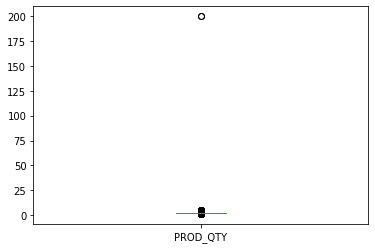

In [32]:
mdf1.boxplot(column =['PROD_QTY'], grid = False)
plt.show()

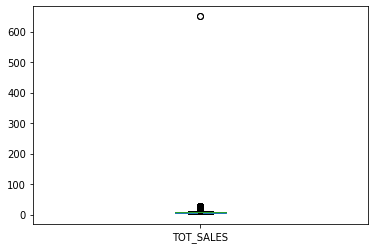

In [33]:
mdf1.boxplot(column =['TOT_SALES'], grid = False)
plt.show()

In [34]:
mdf1.sort_values(by="PROD_QTY", ascending=False).head()

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER       DATE  \
71457           226000          OLDER FAMILIES          Premium 2019-05-20   
71456           226000          OLDER FAMILIES          Premium 2018-08-19   
171901           23102                RETIREES          Premium 2018-08-19   
151906          118021                RETIREES       Mainstream 2019-05-20   
17163            57237  MIDAGE SINGLES/COUPLES          Premium 2019-05-16   

        STORE_NBR  TXN_ID  PROD_NBR                               PROD_NAME  \
71457         226  226210         4        Dorito Corn Chp     Supreme 380g   
71456         226  226201         4        Dorito Corn Chp     Supreme 380g   
171901         23   19371        26            Pringles Sweet&Spcy BBQ 134g   
151906        118  120799        14  Smiths Crnkle Chip  Orgnl Big Bag 380g   
17163          57   52658        82   Smith Crinkle Cut   Mac N Cheese 150g   

        PROD_QTY  TOT_SALES  
71457        200      650.0  
71456        200      650.0  
171901         5       18.5  
151906         5       29.5  
17163          5       13.0

In [35]:
mdf2 = mdf1[mdf1["PROD_QTY"] < 6]

In [36]:
mdf2["DATE"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  246739
unique                    364
top       2018-12-24 00:00:00
freq                      865
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

Instead of 365, the DATE column only has 364 unique values. 1 is missing.

In [37]:
pd.date_range(start=mdf2["DATE"].min(), end=mdf2["DATE"].max()).difference(mdf2["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)


Using the difference method we see that 2018-12-25 was the missing date.

In [38]:
check_null_date = pd.merge(pd.Series(pd.date_range(start=mdf2["DATE"].min(), end=mdf2["DATE"].max()), name="DATE"), mdf2, on="DATE", how="left")

In [39]:
check_null_date.head()

DATE  LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER  \
0 2018-07-01         55073.0  MIDAGE SINGLES/COUPLES           Budget   
1 2018-07-01         55073.0  MIDAGE SINGLES/COUPLES           Budget   
2 2018-07-01        119051.0  MIDAGE SINGLES/COUPLES           Budget   
3 2018-07-01        269175.0  MIDAGE SINGLES/COUPLES           Budget   
4 2018-07-01         47142.0  MIDAGE SINGLES/COUPLES           Budget   

   STORE_NBR    TXN_ID  PROD_NBR                               PROD_NAME  \
0       55.0   48884.0      99.0        Pringles Sthrn FriedChicken 134g   
1       55.0   48884.0      91.0                CCs Tasty Cheese    175g   
2      119.0  122360.0     113.0                    Twisties Chicken270g   
3      269.0  266094.0      28.0    Thins Potato Chips  Hot & Spicy 175g   
4       47.0   42540.0      14.0  Smiths Crnkle Chip  Orgnl Big Bag 380g   

   PROD_QTY  TOT_SALES  
0       2.0        7.4  
1       2.0        4.2  
2       2.0        9.2  
3       2.0        6.6  
4       2.0       11.8

In [40]:
check_null_date[check_null_date['DATE']=='2018-12-25']

DATE  LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER  STORE_NBR  \
120464 2018-12-25             NaN       NaN              NaN        NaN   

        TXN_ID  PROD_NBR PROD_NAME  PROD_QTY  TOT_SALES  
120464     NaN       NaN       NaN       NaN        NaN

In [41]:
check_null_date.shape

(246740, 10)

In [42]:
#check_null_date["DATE"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


[Text(0, 0, '01'),
 Text(0, 0, '02'),
 Text(0, 0, '03'),
 Text(0, 0, '04'),
 Text(0, 0, '05'),
 Text(0, 0, '06'),
 Text(0, 0, '07'),
 Text(0, 0, '08'),
 Text(0, 0, '09'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '28'),
 Text(0, 0, '29'),
 Text(0, 0, '30'),
 Text(0, 0, '31')]

Text(0.5, 1.0, '2018 December Sales')

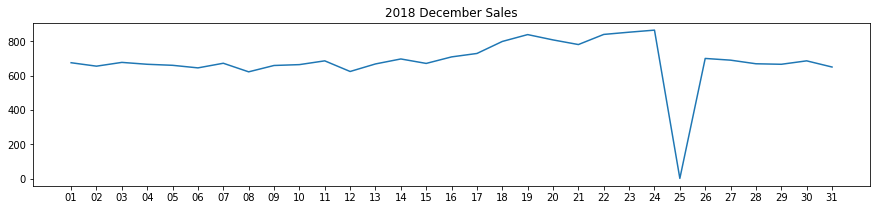

In [43]:
trans_by_date = check_null_date["DATE"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("2018 December Sales")
plt.savefig("2018 December Sales.png", bbox_inches="tight")
plt.show()

In [44]:
check_null_date["DATE"].value_counts().sort_values().head()

2018-12-25      1
2019-06-13    607
2018-09-22    609
2018-11-25    610
2018-10-18    611
Name: DATE, dtype: int64

The date with the no transaction falls on Christmas day, the day when the store is closed. Knowing there's no anomaly in this, we leave it be.

Next, we'll explore product pack sizes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    240675.000000
mean        175.302287
std          60.014592
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64


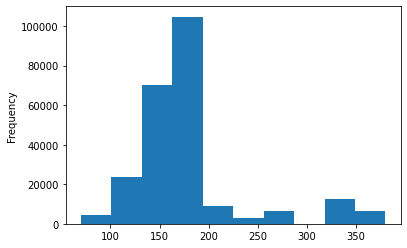

In [45]:
mdf2["PROD_NAME"] = mdf2["PROD_NAME"].str.replace(r'[0-9]+(G)','g')
pack_sizes = mdf2["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")
print(pack_sizes.describe())
pack_sizes.plot.hist()


In [46]:
pack_sizes.value_counts()

175.0    64928
150.0    38705
134.0    25102
110.0    22387
170.0    19983
165.0    15297
330.0    12540
380.0     6416
270.0     6285
200.0     4473
135.0     3257
250.0     3169
210.0     3167
90.0      3008
190.0     2995
160.0     2970
220.0     1564
70.0      1507
180.0     1468
125.0     1454
Name: 0, dtype: int64

Product pack size looks reasonable with highest transaction frequency in mid-sized pack. Smallest size is 70g, and biggest size is 380g.

Next, we will explore the product brand names

In [47]:
mdf2["PROD_NAME"].str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       22041
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Pringles      25102
RRD           11894
Red            4427
Smith          2963
Smiths        27389
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: PROD_NAME, dtype: int64


As we look further than the first word in product name, we can see that some product brands are written in more than 1 way. Dorito and Doritos. Grain and GrnWves. Infuzions and Infzns. Natural and NCC. Red and RRD. Smith and Smiths. Snbts and Sunbites. WW and Woolworths.

In [48]:
k = mdf2["PROD_NAME"].str.split()[mdf2["PROD_NAME"].str.split().str[0] == "Grain"]

In [49]:
type(k)

pandas.core.series.Series

In [50]:
k.head()

16       [Grain, Waves, Sweet, Chilli, 210g]
26     [Grain, Waves, Sour, Cream&Chives, g]
41       [Grain, Waves, Sweet, Chilli, 210g]
228      [Grain, Waves, Sweet, Chilli, 210g]
322      [Grain, Waves, Sweet, Chilli, 210g]
Name: PROD_NAME, dtype: object

In [51]:
mdf2["Cleaned_Brand_Names"] = mdf2["PROD_NAME"].str.split().str[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
mdf2.head()

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER       DATE  \
0            1000   YOUNG SINGLES/COUPLES          Premium 2018-10-17   
1            1307  MIDAGE SINGLES/COUPLES           Budget 2019-05-14   
2            1307  MIDAGE SINGLES/COUPLES           Budget 2018-11-10   
3            1307  MIDAGE SINGLES/COUPLES           Budget 2019-03-09   
4            1343  MIDAGE SINGLES/COUPLES           Budget 2019-05-20   

   STORE_NBR  TXN_ID  PROD_NBR                               PROD_NAME  \
0          1       1         5  Natural Chip        Compny SeaSalt175g   
1          1     348        66                CCs Nacho Cheese    175g   
2          1     346        96          WW Original Stacked Chips 160g   
3          1     347        54                       CCs Original 175g   
4          1     383        61  Smiths Crinkle Cut  Chips Chicken 170g   

   PROD_QTY  TOT_SALES Cleaned_Brand_Names  
0         2        6.0             Natural  
1         3        6.3                 CCs  
2         2        3.8                  WW  
3         1        2.1                 CCs  
4         2        2.9              Smiths

In [53]:
mdf2["Cleaned_Brand_Names"].value_counts()

Kettle        41288
Smiths        27389
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: Cleaned_Brand_Names, dtype: int64

In [54]:
replace_dict ={"Dorito":"Doritos","GrnWves":"Grain Waves","Grain":"Grain Waves","Infzns":"Infuzions","Natural":"Natural Chip Co","NCC":"Natural Chip Co",
               "Red":"RRD","Smith":"Smiths","Snbts":"Sunbites","WW":"Woolworths"}

In [55]:
mdf2['Cleaned_Brand_Names']=mdf2['Cleaned_Brand_Names'].replace(replace_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
mdf2["Cleaned_Brand_Names"].value_counts()

Kettle             41288
Smiths             30352
Doritos            25224
Pringles           25102
RRD                16321
Infuzions          14201
Thins              14075
Woolworths         11836
Cobs                9693
Tostitos            9471
Twisties            9454
Grain Waves         7740
Natural Chip Co     7469
Tyrrells            6442
Cheezels            4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger              1564
French              1418
Name: Cleaned_Brand_Names, dtype: int64

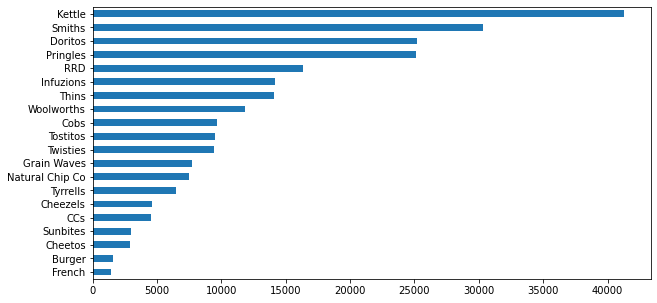

In [57]:
mdf2["Cleaned_Brand_Names"].value_counts(ascending=True).plot.barh(figsize=(10,5))



*   Who spends the most on chips (total sales), describing customers by 
lifestage and how premium their general purchasing behaviour is
*   How many customers are in each segment


*   How many chips are bought per customer by segment



*   What's the average chip price by customer segment












In [58]:
mdf2['pack_sizes'] = pack_sizes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
mdf2.head()

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER       DATE  \
0            1000   YOUNG SINGLES/COUPLES          Premium 2018-10-17   
1            1307  MIDAGE SINGLES/COUPLES           Budget 2019-05-14   
2            1307  MIDAGE SINGLES/COUPLES           Budget 2018-11-10   
3            1307  MIDAGE SINGLES/COUPLES           Budget 2019-03-09   
4            1343  MIDAGE SINGLES/COUPLES           Budget 2019-05-20   

   STORE_NBR  TXN_ID  PROD_NBR                               PROD_NAME  \
0          1       1         5  Natural Chip        Compny SeaSalt175g   
1          1     348        66                CCs Nacho Cheese    175g   
2          1     346        96          WW Original Stacked Chips 160g   
3          1     347        54                       CCs Original 175g   
4          1     383        61  Smiths Crinkle Cut  Chips Chicken 170g   

   PROD_QTY  TOT_SALES Cleaned_Brand_Names  pack_sizes  
0         2        6.0     Natural Chip Co       175.0  
1         3        6.3                 CCs       175.0  
2         2        3.8          Woolworths       160.0  
3         1        2.1                 CCs       175.0  
4         2        2.9              Smiths       170.0

In [60]:
mdf3 = mdf2.loc[:,('LYLTY_CARD_NBR','TXN_ID','LIFESTAGE','PREMIUM_CUSTOMER','DATE','STORE_NBR','PROD_NBR','PROD_QTY',
                   'Cleaned_Brand_Names','pack_sizes','TOT_SALES')]

In [61]:
mdf3.head()

LYLTY_CARD_NBR  TXN_ID               LIFESTAGE PREMIUM_CUSTOMER       DATE  \
0            1000       1   YOUNG SINGLES/COUPLES          Premium 2018-10-17   
1            1307     348  MIDAGE SINGLES/COUPLES           Budget 2019-05-14   
2            1307     346  MIDAGE SINGLES/COUPLES           Budget 2018-11-10   
3            1307     347  MIDAGE SINGLES/COUPLES           Budget 2019-03-09   
4            1343     383  MIDAGE SINGLES/COUPLES           Budget 2019-05-20   

   STORE_NBR  PROD_NBR  PROD_QTY Cleaned_Brand_Names  pack_sizes  TOT_SALES  
0          1         5         2     Natural Chip Co       175.0        6.0  
1          1        66         3                 CCs       175.0        6.3  
2          1        96         2          Woolworths       160.0        3.8  
3          1        54         1                 CCs       175.0        2.1  
4          1        61         2              Smiths       170.0        2.9

In [62]:
mdf3.shape

(246739, 11)

In [63]:
mdf3.nunique()

LYLTY_CARD_NBR          71287
TXN_ID                 245255
LIFESTAGE                   7
PREMIUM_CUSTOMER            3
DATE                      364
STORE_NBR                 271
PROD_NBR                  105
PROD_QTY                    5
Cleaned_Brand_Names        20
pack_sizes                 20
TOT_SALES                 104
dtype: int64

# **Univariate Analysis**

In [64]:
mdf4 = mdf2.loc[:,('LIFESTAGE','PREMIUM_CUSTOMER','DATE','STORE_NBR','PROD_NBR','PROD_QTY',
                   'Cleaned_Brand_Names','pack_sizes','TOT_SALES')]

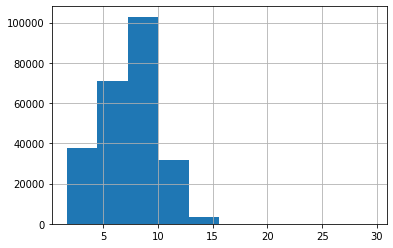

In [65]:
mdf4['TOT_SALES'].hist()

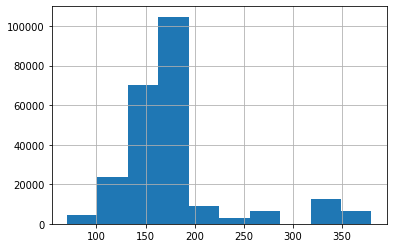

In [66]:
mdf4['pack_sizes'].hist()

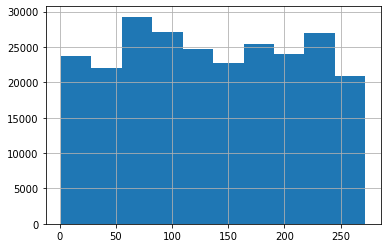

In [67]:
mdf4['STORE_NBR'].hist()

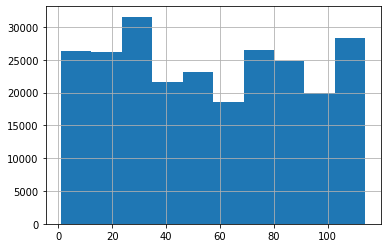

In [68]:
mdf4['PROD_NBR'].hist()

In [69]:
#for x in mdf4:
    #print('\033[1m' + "\nPercentage of frequency count of {}".format(x) + '\033[0m')
    #print((mdf4[x].value_counts()/len(mdf4))*100)

In [70]:
#for x in mdf4:
    #print('\033[1m' + "\nValue count of {}".format(x) + '\033[0m')
    #print((mdf4[x].value_counts()))

In [71]:
#mdf3['LYLTY_CARD_NBR'].value_counts().sort_values()

In [72]:
mdf3[mdf3['STORE_NBR'].isin([193,11,85,206,252,31,76,92])].shape #stores have less than < 3 value count (outliers)

(15, 11)

In [73]:
mdf3[mdf3['LYLTY_CARD_NBR'].isin(mdf3[mdf3['STORE_NBR'].isin([193,11,85,206,252,31,76,92]) ]["LYLTY_CARD_NBR"])].shape #unique card number

(15, 11)

In [74]:
mdf5 = mdf3[~mdf3['STORE_NBR'].isin([193,11,85,206,252,31,76,92])]

In [75]:
mdf4.shape
mdf5.shape

(246739, 9)

(246724, 11)

In [76]:
mdf5.head()

LYLTY_CARD_NBR  TXN_ID               LIFESTAGE PREMIUM_CUSTOMER       DATE  \
0            1000       1   YOUNG SINGLES/COUPLES          Premium 2018-10-17   
1            1307     348  MIDAGE SINGLES/COUPLES           Budget 2019-05-14   
2            1307     346  MIDAGE SINGLES/COUPLES           Budget 2018-11-10   
3            1307     347  MIDAGE SINGLES/COUPLES           Budget 2019-03-09   
4            1343     383  MIDAGE SINGLES/COUPLES           Budget 2019-05-20   

   STORE_NBR  PROD_NBR  PROD_QTY Cleaned_Brand_Names  pack_sizes  TOT_SALES  
0          1         5         2     Natural Chip Co       175.0        6.0  
1          1        66         3                 CCs       175.0        6.3  
2          1        96         2          Woolworths       160.0        3.8  
3          1        54         1                 CCs       175.0        2.1  
4          1        61         2              Smiths       170.0        2.9

# **Bi-variate Analysis**


bar chart between LIFESTAGE and total sales


sum      mean
LIFESTAGE                                  
OLDER SINGLES/COUPLES   375992.05  7.403313
RETIREES                342369.40  7.374042
OLDER FAMILIES          328511.10  7.274865
YOUNG FAMILIES          294617.30  7.275938
YOUNG SINGLES/COUPLES   243743.60  7.176317
MIDAGE SINGLES/COUPLES  172514.60  7.373364
NEW FAMILIES             47347.95  7.287664

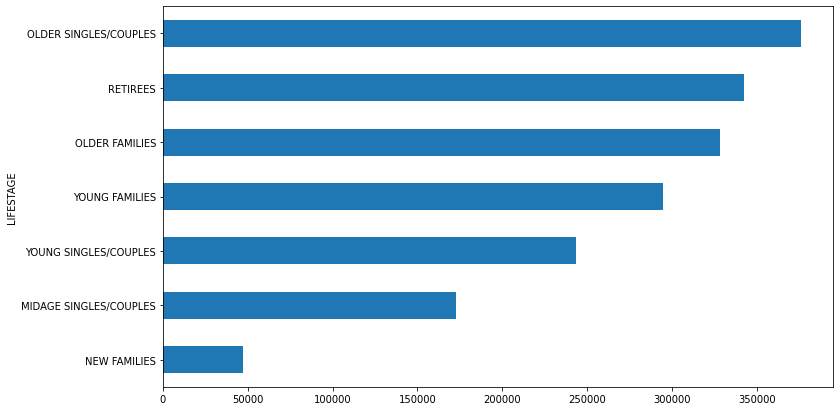

In [77]:
print('\033[1m' + "\nbar chart between LIFESTAGE and total sales" + '\033[0m')
df_grp = pd.DataFrame(mdf5.groupby(["LIFESTAGE"])["TOT_SALES"].agg(["sum", "mean"]))
df_grp.sort_values(ascending=False, by="sum")
df_grp["sum"].sort_values().plot.barh(figsize=(12,7))


bar chart between Lifestage and total sales
                         average  min   max
LIFESTAGE                                  
MIDAGE SINGLES/COUPLES  7.373364  1.7  29.5
NEW FAMILIES            7.287664  1.7  27.0
OLDER FAMILIES          7.274865  1.7  29.5
OLDER SINGLES/COUPLES   7.403313  1.7  29.5
RETIREES                7.374042  1.7  29.5
YOUNG FAMILIES          7.275938  1.7  29.5
YOUNG SINGLES/COUPLES   7.176317  1.7  27.0


Text(0.5, 1.0, 'xx')

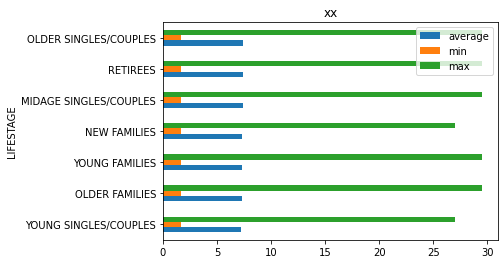

In [78]:
print('\033[1m' + "\nbar chart between Lifestage and total sales" + '\033[0m')
df_grp = mdf5.groupby(["LIFESTAGE"])["TOT_SALES"]
xx = pd.concat(
    [df_grp.mean().rename('average'), df_grp.min().rename('min'), 
      df_grp.max().rename('max')],
    axis=1)
print(xx)
xx.sort_values(by='average').plot.barh().set_title('xx')

**Insights**:
Midage singles/Couples and New families have high average sale after two high categories but don't have high total sales comapratively. So need to focus in these two groups to increase total sales also with avg sale.



bar chart between PREMIUM_CUSTOMER and total sales


sum      mean
PREMIUM_CUSTOMER                     
Mainstream        700832.90  7.374316
Budget            631376.95  7.277533
Premium           472886.15  7.283015

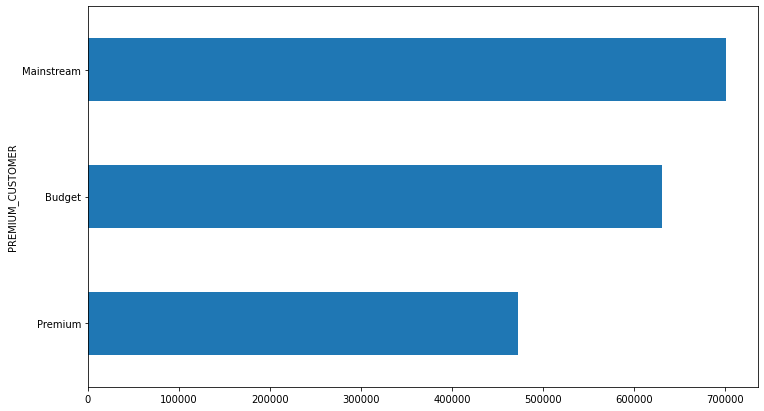

In [79]:
print('\033[1m' + "\nbar chart between PREMIUM_CUSTOMER and total sales" + '\033[0m')
df_grp = pd.DataFrame(mdf5.groupby(["PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))
df_grp.sort_values(ascending=False, by="sum")
df_grp["sum"].sort_values().plot.barh(figsize=(12,7))


bar chart between Premium customers and total sales
                   average  min   max
PREMIUM_CUSTOMER                     
Budget            7.277533  1.7  29.5
Mainstream        7.374316  1.7  29.5
Premium           7.283015  1.7  29.5


Text(0.5, 1.0, 'xx')

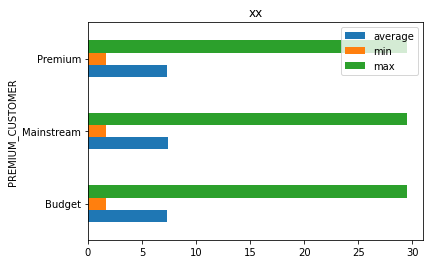

In [80]:
print('\033[1m' + "\nbar chart between Premium customers and total sales" + '\033[0m')
df_grp = mdf5.groupby(["PREMIUM_CUSTOMER"])["TOT_SALES"]
xx = pd.concat(
    [df_grp.mean().rename('average'), df_grp.min().rename('min'), 
      df_grp.max().rename('max')],
    axis=1)
print(xx)
xx.plot.barh().set_title('xx')


bar chart between PROD_QTY and total sales


sum       mean
PROD_QTY                       
2         1692272.70   7.689947
1           94933.50   3.727706
5            7603.95  18.322771
4            5574.20  15.024798
3            4711.65  11.548162

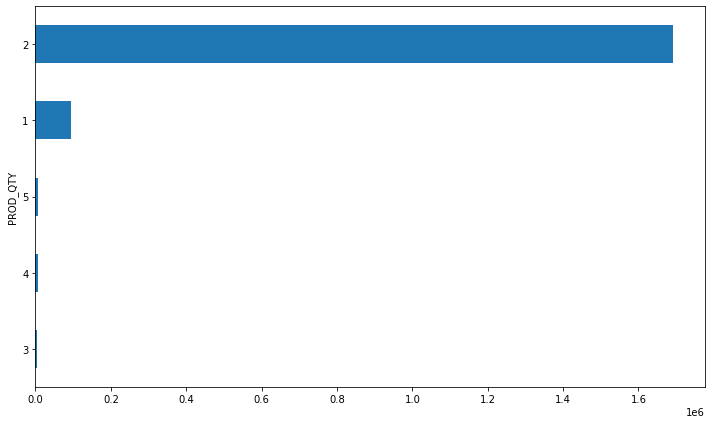

In [81]:
print('\033[1m' + "\nbar chart between PROD_QTY and total sales" + '\033[0m')
df_grp = pd.DataFrame(mdf5.groupby(["PROD_QTY"])["TOT_SALES"].agg(["sum", "mean"]))
df_grp.sort_values(ascending=False, by="sum")
df_grp["sum"].sort_values().plot.barh(figsize=(12,7))


bar chart between PROD_QTY and total sales
            average  min   max
PROD_QTY                      
1          3.727706  1.7   6.5
2          7.689947  2.7  13.0
3         11.548162  5.1  19.5
4         15.024798  6.8  23.6
5         18.322771  6.6  29.5


Text(0.5, 1.0, 'xx')

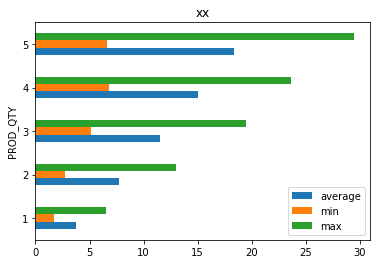

In [82]:
print('\033[1m' + "\nbar chart between PROD_QTY and total sales" + '\033[0m')
df_grp = mdf5.groupby(["PROD_QTY"])["TOT_SALES"]
xx = pd.concat(
    [df_grp.mean().rename('average'), df_grp.min().rename('min'), 
      df_grp.max().rename('max')],
    axis=1)
print(xx)
xx.plot.barh().set_title('xx')

**Insights:**
prod_qty 2 has highest total sales but 5 has higest avg sale. need to focus on total sale and avg sale simultaneoulsy. There are possiblities for category 4 to get high total sale as well as high avg sale. 



bar chart between Cleaned_Brand_Names and total sales


sum      mean
Cleaned_Brand_Names                    
Kettle               390226.0  9.451775
Doritos              226321.1  8.972807
Smiths               217471.1  7.165676
Pringles             177644.4  7.077748
Infuzions             99040.0  6.974648
Thins                 88852.5  6.312789
RRD                   87604.5  5.367923
Twisties              81522.1  8.623027
Tostitos              79780.8  8.424583
Cobs                  70566.0  7.280850
Tyrrells              51647.4  8.017293
Grain Waves           51617.2  6.668889
Natural Chip Co       42318.0  5.665819
Woolworths            41057.3  3.469142
Cheezels              40029.9  8.696481
CCs                   18076.8  3.972923
Cheetos               16884.5  5.768534
Sunbites               9676.4  3.216888
French                 7929.0  5.591678
Burger                 6831.0  4.367647

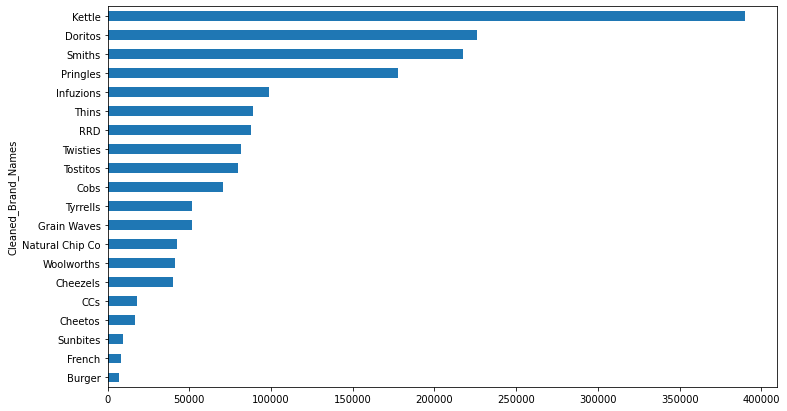

In [83]:
print('\033[1m' + "\nbar chart between Cleaned_Brand_Names and total sales" + '\033[0m')
df_grp = pd.DataFrame(mdf5.groupby(["Cleaned_Brand_Names"])["TOT_SALES"].agg(["sum", "mean"]))
df_grp.sort_values(ascending=False, by="sum")
df_grp["sum"].sort_values().plot.barh(figsize=(12,7))



bar chart between Cleaned_Brand_Names and total sales


Text(0.5, 1.0, 'xx')

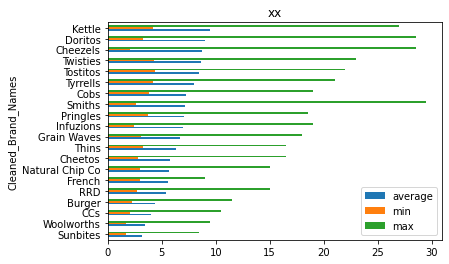

In [84]:
print('\033[1m' + "\nbar chart between Cleaned_Brand_Names and total sales" + '\033[0m')
df_grp = mdf5.groupby(["Cleaned_Brand_Names"])["TOT_SALES"]
xx = pd.concat(
    [df_grp.mean().rename('average'), df_grp.min().rename('min'), 
      df_grp.max().rename('max')],
    axis=1)

xx.sort_values(by='average').plot.barh().set_title('xx')

**Insights:**
There are so many brands which have opportunity to increase sales. As per avg sale after kettle and doritos there are 6 brands from cheezles to cobs in avg sales graph need focus to increase sales.



In [85]:
mdf5.head()

LYLTY_CARD_NBR  TXN_ID               LIFESTAGE PREMIUM_CUSTOMER       DATE  \
0            1000       1   YOUNG SINGLES/COUPLES          Premium 2018-10-17   
1            1307     348  MIDAGE SINGLES/COUPLES           Budget 2019-05-14   
2            1307     346  MIDAGE SINGLES/COUPLES           Budget 2018-11-10   
3            1307     347  MIDAGE SINGLES/COUPLES           Budget 2019-03-09   
4            1343     383  MIDAGE SINGLES/COUPLES           Budget 2019-05-20   

   STORE_NBR  PROD_NBR  PROD_QTY Cleaned_Brand_Names  pack_sizes  TOT_SALES  
0          1         5         2     Natural Chip Co       175.0        6.0  
1          1        66         3                 CCs       175.0        6.3  
2          1        96         2          Woolworths       160.0        3.8  
3          1        54         1                 CCs       175.0        2.1  
4          1        61         2              Smiths       170.0        2.9

In [86]:
grouped_sales = pd.DataFrame(mdf5.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))
grouped_sales.sort_values(ascending=False, by="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            156854.95  7.291170
YOUNG SINGLES/COUPLES  Mainstream        147573.90  7.551627
RETIREES               Mainstream        145168.95  7.269352
YOUNG FAMILIES         Budget            129710.35  7.302688
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
                       Mainstream        124636.50  7.306202
                       Premium           123521.95  7.460857
RETIREES               Budget            105907.50  7.445690
OLDER FAMILIES         Mainstream         96413.55  7.281440
RETIREES               Premium            91292.95  7.461622
YOUNG FAMILIES         Mainstream         86335.25  7.227126
MIDAGE SINGLES/COUPLES Mainstream         84725.05  7.637016
YOUNG FAMILIES         Premium            78571.70  7.285951
OLDER FAMILIES         Premium            75242.60  7.232779
YOUNG SINGLES/COUPLES  Budget             57117.40  6.664030
MIDAGE SINGLES/COUPLES Premium            54443.85  7.152371
YOUNG SINGLES/COUPLES  Premium            39052.30  6.673325
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
NEW FAMILIES           Budget             20607.45  7.297256
                       Mainstream         15979.70  7.313364
                       Premium            10760.80  7.231720

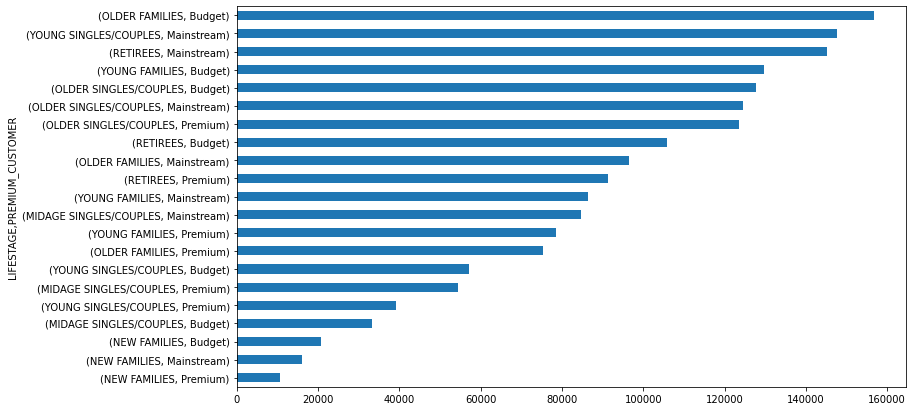

In [87]:
grouped_sales["sum"].sort_values().plot.barh(figsize=(12,7))

The top 3 total sales contributor segment are (in order):

Older families (Budget) \$156,864

Young Singles/Couples (Mainstream) \$147,582

Retirees (Mainstream) \$145,169

<Figure size 936x360 with 0 Axes>

Text(16672.849999999984, 0, '1.8%')

Text(75708.22500000065, 0, '4.7%')

Text(145292.67500000182, 0, '3.0%')

Text(10303.724999999946, 1, '1.1%')

Text(28597.299999999854, 1, '0.9%')

Text(41967.54999999981, 1, '0.6%')

Text(78427.47499999705, 2, '8.7%')

Text(205061.72499999427, 2, '5.3%')

Text(290889.7999999952, 2, '4.2%')

Text(63916.799999999705, 3, '7.1%')

Text(190151.8499999995, 3, '6.9%')

Text(314231.07499999984, 3, '6.8%')

Text(52953.75000000095, 4, '5.9%')

Text(178491.97500000038, 4, '8.0%')

Text(296722.9249999993, 4, '5.1%')

Text(64855.17499999975, 5, '7.2%')

Text(172877.97499999998, 5, '4.8%')

Text(255331.4500000009, 5, '4.4%')

Text(28558.70000000052, 6, '3.2%')

Text(130904.34999999986, 6, '8.2%')

Text(224217.4499999988, 6, '2.2%')

([<matplotlib.axis.YTick at 0x7f4fcd8b8750>,
 [Text(0, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(0, 0, 'NEW FAMILIES'),
  Text(0, 0, 'OLDER FAMILIES'),
  Text(0, 0, 'OLDER SINGLES/COUPLES'),
  Text(0, 0, 'RETIREES'),
  Text(0, 0, 'YOUNG FAMILIES'),
  Text(0, 0, 'YOUNG SINGLES/COUPLES')])

Text(0, 0.5, 'LIFESTAGE')

Text(0.5, 0, 'TOTAL SALES')

Text(0.5, 1.0, 'Total Sales per Lifestage')

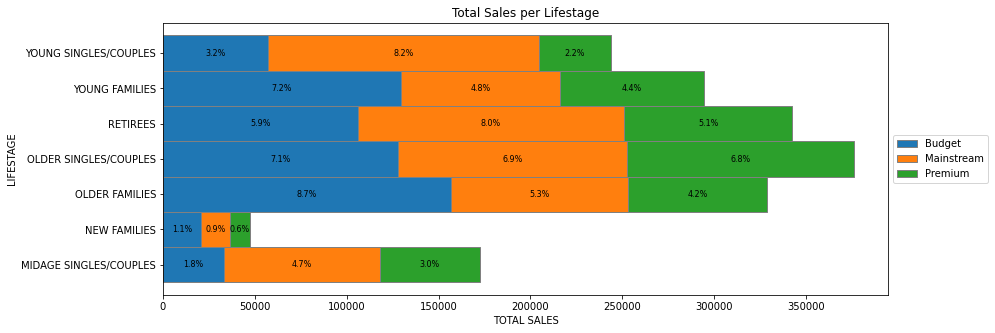

In [88]:
# Values of each group
bars1 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["sum"]
bars2 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["sum"]
bars3 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["sum"]
 
bars1_text = (bars1 / sum(grouped_sales["sum"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(grouped_sales["sum"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(grouped_sales["sum"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = grouped_sales.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(13,5)) 

# Create brown bars
budget_bar = plt.barh(r, bars1, edgecolor='grey', height=1, label="Budget")
# Create green bars (middle), on top of the firs ones
mains_bar = plt.barh(r, bars2, left=bars1, edgecolor='grey', height=1, label="Mainstream")
# Create green bars (top)
prem_bar = plt.barh(r, bars3, left=np.add(bars1.to_list(), bars2.to_list()), edgecolor='grey', height=1, label="Premium")


    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=8)
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=8)
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("TOTAL SALES")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Total Sales per Lifestage")

plt.savefig("lifestage_sales.png", bbox_inches="tight")

# Show graphic
plt.show()

In [89]:
stage_agg_prem = mdf5.groupby("LIFESTAGE")["PREMIUM_CUSTOMER"].agg(pd.Series.mode).sort_values()
print("Top contributor per LIFESTAGE by PREMIUM category")
print(stage_agg_prem)

Top contributor per LIFESTAGE by PREMIUM category
LIFESTAGE
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
OLDER SINGLES/COUPLES         Budget
YOUNG FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
RETIREES                  Mainstream
YOUNG SINGLES/COUPLES     Mainstream
Name: PREMIUM_CUSTOMER, dtype: object


In [90]:
unique_cust = mdf5.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False)
pd.DataFrame(unique_cust)

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  7915
RETIREES               Mainstream                  6358
OLDER SINGLES/COUPLES  Mainstream                  4856
                       Budget                      4849
                       Premium                     4679
OLDER FAMILIES         Budget                      4610
RETIREES               Budget                      4384
YOUNG FAMILIES         Budget                      3952
RETIREES               Premium                     3811
YOUNG SINGLES/COUPLES  Budget                      3645
MIDAGE SINGLES/COUPLES Mainstream                  3297
OLDER FAMILIES         Mainstream                  2788
YOUNG FAMILIES         Mainstream                  2684
YOUNG SINGLES/COUPLES  Premium                     2480
YOUNG FAMILIES         Premium                     2398
MIDAGE SINGLES/COUPLES Premium                     2369
OLDER FAMILIES         Premium                     2231
MIDAGE SINGLES/COUPLES Budget                      1474
NEW FAMILIES           Budget                      1087
                       Mainstream                   830
                       Premium                      575

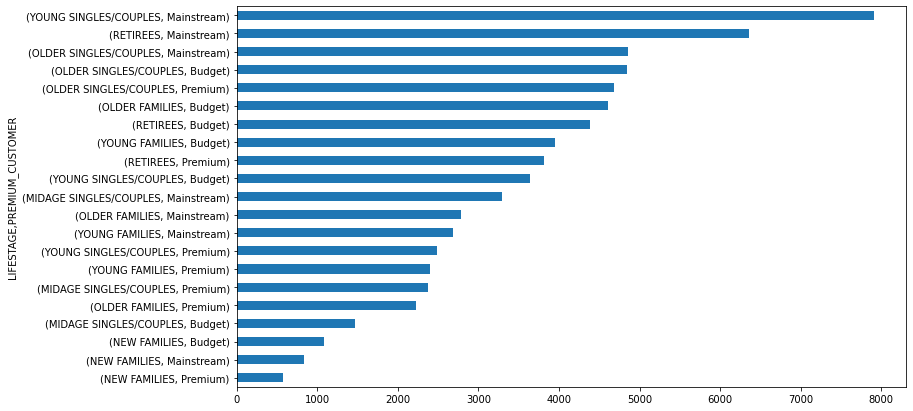

In [91]:
unique_cust.sort_values().plot.barh(figsize=(12,7))


<Figure size 936x360 with 0 Axes>

Text(2424.5, 0, '6.8%')

Text(8806.5, 0, '11.1%')

Text(15103.5, 0, '6.6%')

Text(2305.0, 1, '6.5%')

Text(7789.0, 1, '8.9%')

Text(12873.5, 1, '5.3%')

Text(2192.0, 2, '6.2%')

Text(6812.0, 2, '6.8%')

Text(10480.0, 2, '3.5%')

Text(1976.0, 3, '5.5%')

Text(5600.5, 3, '4.6%')

Text(8448.0, 3, '3.4%')

Text(1822.5, 4, '5.1%')

Text(5039.0, 4, '3.9%')

Text(7617.5, 4, '3.3%')

Text(737.0, 5, '2.1%')

Text(2816.0, 5, '3.8%')

Text(5273.5, 5, '3.1%')

Text(543.5, 6, '1.5%')

Text(1502.0, 6, '1.2%')

Text(2204.5, 6, '0.8%')

([<matplotlib.axis.YTick at 0x7f4fccc8b7d0>,
 [Text(0, 0, 'YOUNG SINGLES/COUPLES'),
  Text(0, 0, 'RETIREES'),
  Text(0, 0, 'OLDER SINGLES/COUPLES'),
  Text(0, 0, 'OLDER FAMILIES'),
  Text(0, 0, 'YOUNG FAMILIES'),
  Text(0, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(0, 0, 'NEW FAMILIES')])

Text(0, 0.5, 'LIFESTAGE')

Text(0.5, 0, 'UNIQUE CUSTOMERS')

Text(0.5, 1.0, 'Unique Customers per Lifestage')

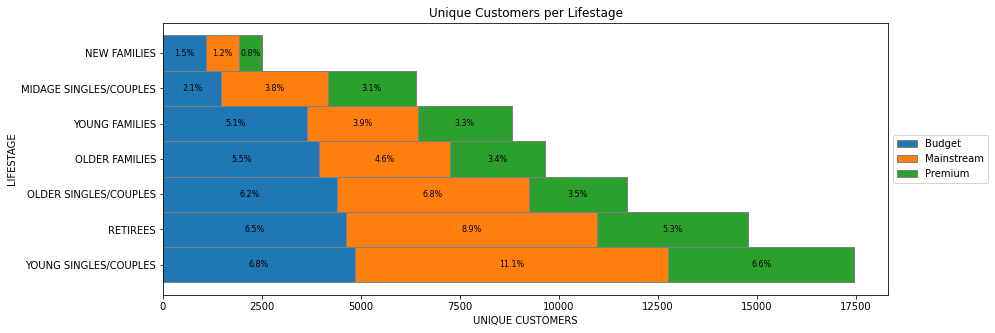

In [92]:

# Values of each group
ncust_bars1 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]
ncust_bars2 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]
ncust_bars3 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]
 
ncust_bars1_text = (ncust_bars1 / sum(unique_cust)).apply("{:.1%}".format)
ncust_bars2_text = (ncust_bars2 / sum(unique_cust)).apply("{:.1%}".format)
ncust_bars3_text = (ncust_bars3 / sum(unique_cust)).apply("{:.1%}".format)
 
# # Names of group and bar width
names = unique_cust.index.get_level_values("LIFESTAGE").unique()

# # The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(13,5)) 

# # Create brown bars
budget_bar = plt.barh(r, ncust_bars1, edgecolor='grey', height=1, label="Budget")
# # Create green bars (middle), on top of the firs ones
mains_bar = plt.barh(r, ncust_bars2, left=ncust_bars1, edgecolor='grey', height=1, label="Mainstream")
# # Create green bars (top)
prem_bar = plt.barh(r, ncust_bars3, left=np.add(ncust_bars1.to_list(), ncust_bars2.to_list()), edgecolor='grey', height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, ncust_bars1_text[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_bar[i].get_width()/2, i, ncust_bars2_text[i], va='center', ha='center', size=8)
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, ncust_bars3_text[i], va='center', ha='center', size=8)
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("UNIQUE CUSTOMERS")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Unique Customers per Lifestage")

plt.savefig("lifestage_customers.png", bbox_inches="tight")

# # Show graphic
plt.show()

The high sales amount by segment "Young Singles/Couples - Mainstream" and "Retirees - Mainstream" are due to their large number of unique customers, but not for the "Older - Budget" segment. Next we'll explore if the "Older - Budget" segment has:

High Frequency of Purchase and,

Average Sales per Customer compared to the other segment.

In [93]:
mdf5.head()

LYLTY_CARD_NBR  TXN_ID               LIFESTAGE PREMIUM_CUSTOMER       DATE  \
0            1000       1   YOUNG SINGLES/COUPLES          Premium 2018-10-17   
1            1307     348  MIDAGE SINGLES/COUPLES           Budget 2019-05-14   
2            1307     346  MIDAGE SINGLES/COUPLES           Budget 2018-11-10   
3            1307     347  MIDAGE SINGLES/COUPLES           Budget 2019-03-09   
4            1343     383  MIDAGE SINGLES/COUPLES           Budget 2019-05-20   

   STORE_NBR  PROD_NBR  PROD_QTY Cleaned_Brand_Names  pack_sizes  TOT_SALES  
0          1         5         2     Natural Chip Co       175.0        6.0  
1          1        66         3                 CCs       175.0        6.3  
2          1        96         2          Woolworths       160.0        3.8  
3          1        54         1                 CCs       175.0        2.1  
4          1        61         2              Smiths       170.0        2.9

In [94]:
freq_per_cust = mdf5.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]).count()["TOT_SALES"]
freq_per_cust.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(["mean", "count"]).sort_values(ascending=False, by="mean")

mean  count
LIFESTAGE              PREMIUM_CUSTOMER                 
OLDER FAMILIES         Mainstream        4.749283   2788
                       Budget            4.666594   4610
                       Premium           4.662931   2231
YOUNG FAMILIES         Premium           4.497081   2398
                       Budget            4.494433   3952
                       Mainstream        4.450820   2684
OLDER SINGLES/COUPLES  Budget            3.541349   4849
                       Premium           3.538363   4679
                       Mainstream        3.512974   4856
MIDAGE SINGLES/COUPLES Mainstream        3.364877   3297
RETIREES               Budget            3.244526   4384
MIDAGE SINGLES/COUPLES Premium           3.213170   2369
RETIREES               Premium           3.210443   3811
MIDAGE SINGLES/COUPLES Budget            3.182497   1474
RETIREES               Mainstream        3.140925   6358
NEW FAMILIES           Mainstream        2.632530    830
                       Budget            2.597976   1087
                       Premium           2.587826    575
YOUNG SINGLES/COUPLES  Mainstream        2.468983   7915
                       Premium           2.359677   2480
                       Budget            2.351440   3645

The above table describes the "Average frequency of Purchase per segment" and "Unique customer per segment". The top three most frequent purchase is contributed by the "Older Families" lifestage segment. We can see now that the "Older - Budget" segment contributes to high sales partly because of the combination of:

High Frequency of Purchase and,

Fairly high unique number of customer in the segment


bar chart between Cleaned_Brand_Names and total sales


Text(0.5, 1.0, 'xx')

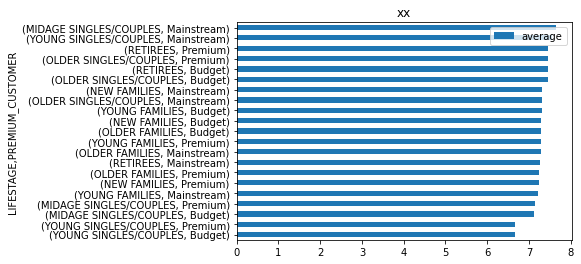

In [95]:
print('\033[1m' + "\nbar chart between Cleaned_Brand_Names and total sales" + '\033[0m')
df_grp = mdf5.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["TOT_SALES"]
xx = pd.concat(
    [df_grp.mean().rename('average')],
    axis=1)

xx.sort_values(by='average').plot.barh().set_title('xx')

In [96]:
grouped_sales.sort_values(ascending=False, by="mean")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
MIDAGE SINGLES/COUPLES Mainstream         84725.05  7.637016
YOUNG SINGLES/COUPLES  Mainstream        147573.90  7.551627
RETIREES               Premium            91292.95  7.461622
OLDER SINGLES/COUPLES  Premium           123521.95  7.460857
RETIREES               Budget            105907.50  7.445690
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
NEW FAMILIES           Mainstream         15979.70  7.313364
OLDER SINGLES/COUPLES  Mainstream        124636.50  7.306202
YOUNG FAMILIES         Budget            129710.35  7.302688
NEW FAMILIES           Budget             20607.45  7.297256
OLDER FAMILIES         Budget            156854.95  7.291170
YOUNG FAMILIES         Premium            78571.70  7.285951
OLDER FAMILIES         Mainstream         96413.55  7.281440
RETIREES               Mainstream        145168.95  7.269352
OLDER FAMILIES         Premium            75242.60  7.232779
NEW FAMILIES           Premium            10760.80  7.231720
YOUNG FAMILIES         Mainstream         86335.25  7.227126
MIDAGE SINGLES/COUPLES Premium            54443.85  7.152371
                       Budget             33345.70  7.108442
YOUNG SINGLES/COUPLES  Premium            39052.30  6.673325
                       Budget             57117.40  6.664030

Highest average spending per purchase are contributed by the Midage and Young "Singles/Couples". The difference between their Mainstream and Non-Mainstream group might seem insignificant (7.6 vs 6.6), but we'll find out by examining if the difference is statistically significant.

In [97]:
from scipy.stats import ttest_ind

mainstream = mdf2["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (mdf2["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (mdf2["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")

budget_premium = (mdf2["PREMIUM_CUSTOMER"] == "Budget") | (mdf2["PREMIUM_CUSTOMER"] == "Premium")

a = mdf2[young_midage & mainstream]["TOT_SALES"]
b = mdf2[young_midage & budget_premium]["TOT_SALES"]
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(pval)
pval < 0.0000001

1.8346459081757317e-237


True

P-Value is close to 0. There is a statistically significant difference to the Total Sales between the "Mainstream Young Midage" segment to the "Budget and Premium Young Midage" segment.

Next, let's look examine what brand of chips the top 3 segments contributing to Total Sales are buying.

In [98]:
mdf5.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["Cleaned_Brand_Names"].agg(pd.Series.mode).sort_values()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
YOUNG SINGLES/COUPLES   Budget              Kettle
YOUNG FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
RETIREES                Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
OLDER SINGLES/COUPLES   Premium             Kettle
YOUNG SINGLES/COUPLES   Mainstream          Kettle
OLDER SINGLES/COUPLES   Mainstream          Kettle
OLDER FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
NEW FAMILIES            Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
MIDAGE SINGLES/COUPLES  Premium             Kettle
                        Mainstream       

========== YOUNG SINGLES/COUPLES - Premium ==========
Kettle      838
Smiths      787
Pringles    537
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

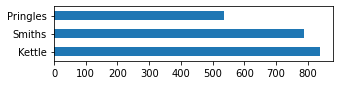

========== YOUNG SINGLES/COUPLES - Budget ==========
Kettle      1211
Smiths      1184
Pringles     832
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

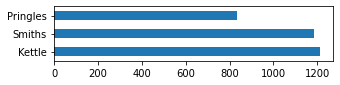

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Kettle      3843
Doritos     2379
Pringles    2314
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

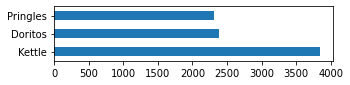

========== MIDAGE SINGLES/COUPLES - Premium ==========
Kettle      1206
Smiths       923
Pringles     781
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

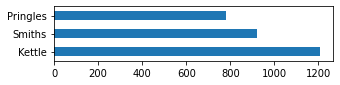

========== MIDAGE SINGLES/COUPLES - Budget ==========
Kettle     713
Smiths     591
Doritos    479
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

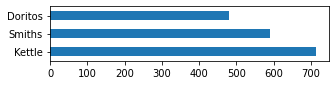

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Kettle     2135
Smiths     1276
Doritos    1210
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

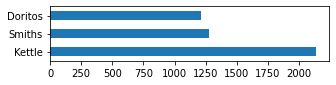

========== NEW FAMILIES - Premium ==========
Kettle      247
Pringles    165
Smiths      155
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

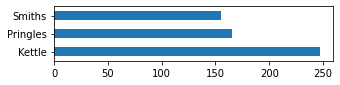

========== NEW FAMILIES - Budget ==========
Kettle     510
Smiths     328
Doritos    315
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

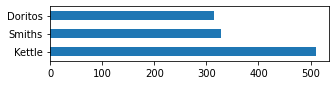

========== NEW FAMILIES - Mainstream ==========
Kettle     414
Doritos    257
Smiths     244
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

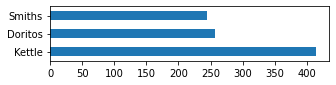

========== OLDER FAMILIES - Premium ==========
Kettle      1512
Smiths      1448
Pringles    1014
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

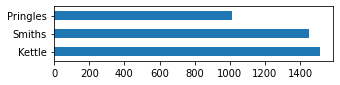

========== OLDER FAMILIES - Budget ==========
Kettle     3320
Smiths     2948
Doritos    2031
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

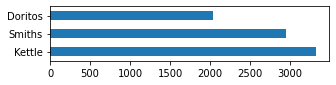

========== OLDER FAMILIES - Mainstream ==========
Kettle     2019
Smiths     1742
Doritos    1263
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

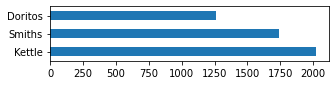

========== OLDER SINGLES/COUPLES - Premium ==========
Kettle     2947
Smiths     1951
Doritos    1784
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

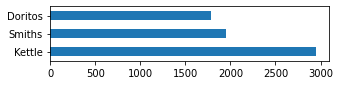

========== OLDER SINGLES/COUPLES - Budget ==========
Kettle      3065
Smiths      2010
Pringles    1843
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

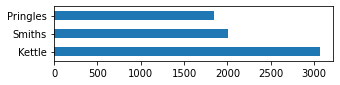

========== OLDER SINGLES/COUPLES - Mainstream ==========
Kettle     2835
Smiths     2068
Doritos    1791
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

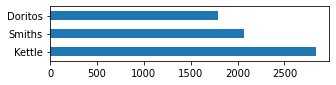

========== RETIREES - Premium ==========
Kettle      2216
Smiths      1395
Pringles    1330
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

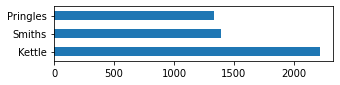

========== RETIREES - Budget ==========
Kettle     2592
Smiths     1612
Doritos    1592
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

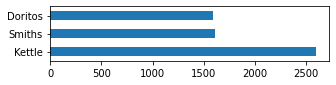

========== RETIREES - Mainstream ==========
Kettle      3386
Smiths      2367
Pringles    2103
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

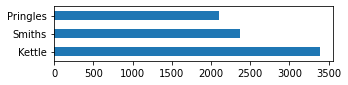

========== YOUNG FAMILIES - Premium ==========
Kettle      1745
Smiths      1384
Pringles    1007
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

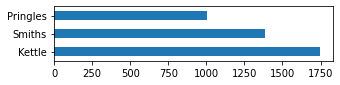

========== YOUNG FAMILIES - Budget ==========
Kettle     2743
Smiths     2334
Doritos    1767
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

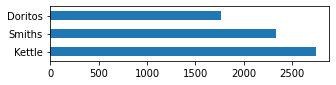

========== YOUNG FAMILIES - Mainstream ==========
Kettle      1789
Smiths      1681
Pringles    1148
Name: Cleaned_Brand_Names, dtype: int64


<Figure size 432x288 with 0 Axes>

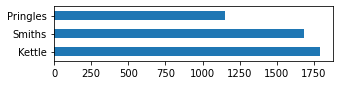

In [99]:
for stage in mdf5["LIFESTAGE"].unique():
    for prem in mdf5["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = mdf5[(mdf5["LIFESTAGE"] == stage) & (mdf5["PREMIUM_CUSTOMER"] == prem)]["Cleaned_Brand_Names"].value_counts().head(3)
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

**Every segment had Kettle as the most purchased brand. Every segment except "YOUNG SINGLES/COUPLES Mainstream" had Smiths as their second most purchased brand. "YOUNG SINGLES/COUPLES Mainstream" had Doritos as their second most purchased brand.**

In [100]:
mdf5.head()

LYLTY_CARD_NBR  TXN_ID               LIFESTAGE PREMIUM_CUSTOMER       DATE  \
0            1000       1   YOUNG SINGLES/COUPLES          Premium 2018-10-17   
1            1307     348  MIDAGE SINGLES/COUPLES           Budget 2019-05-14   
2            1307     346  MIDAGE SINGLES/COUPLES           Budget 2018-11-10   
3            1307     347  MIDAGE SINGLES/COUPLES           Budget 2019-03-09   
4            1343     383  MIDAGE SINGLES/COUPLES           Budget 2019-05-20   

   STORE_NBR  PROD_NBR  PROD_QTY Cleaned_Brand_Names  pack_sizes  TOT_SALES  
0          1         5         2     Natural Chip Co       175.0        6.0  
1          1        66         3                 CCs       175.0        6.3  
2          1        96         2          Woolworths       160.0        3.8  
3          1        54         1                 CCs       175.0        2.1  
4          1        61         2              Smiths       170.0        2.9

In [101]:
mdf5["Segment"] = mdf5["LIFESTAGE"] + ' - ' + mdf5['PREMIUM_CUSTOMER']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
mdf5.head()

LYLTY_CARD_NBR  TXN_ID               LIFESTAGE PREMIUM_CUSTOMER       DATE  \
0            1000       1   YOUNG SINGLES/COUPLES          Premium 2018-10-17   
1            1307     348  MIDAGE SINGLES/COUPLES           Budget 2019-05-14   
2            1307     346  MIDAGE SINGLES/COUPLES           Budget 2018-11-10   
3            1307     347  MIDAGE SINGLES/COUPLES           Budget 2019-03-09   
4            1343     383  MIDAGE SINGLES/COUPLES           Budget 2019-05-20   

   STORE_NBR  PROD_NBR  PROD_QTY Cleaned_Brand_Names  pack_sizes  TOT_SALES  \
0          1         5         2     Natural Chip Co       175.0        6.0   
1          1        66         3                 CCs       175.0        6.3   
2          1        96         2          Woolworths       160.0        3.8   
3          1        54         1                 CCs       175.0        2.1   
4          1        61         2              Smiths       170.0        2.9   

                           Segment  
0  YOUNG SINGLES/COUPLES - Premium  
1  MIDAGE SINGLES/COUPLES - Budget  
2  MIDAGE SINGLES/COUPLES - Budget  
3  MIDAGE SINGLES/COUPLES - Budget  
4  MIDAGE SINGLES/COUPLES - Budget

========== YOUNG SINGLES/COUPLES - Premium ==========
134.0     537
150.0     896
175.0    1587
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

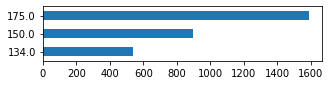

========== YOUNG SINGLES/COUPLES - Budget ==========
134.0     832
150.0    1325
175.0    2262
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

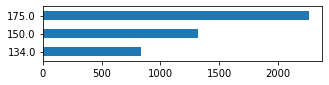

========== YOUNG SINGLES/COUPLES - Mainstream ==========
134.0    2314
150.0    2997
175.0    4928
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

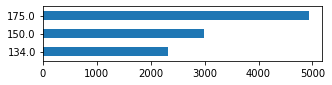

========== MIDAGE SINGLES/COUPLES - Premium ==========
134.0     781
150.0    1163
175.0    2034
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

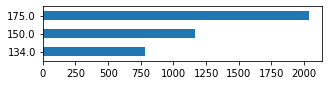

========== MIDAGE SINGLES/COUPLES - Budget ==========
134.0     449
150.0     746
175.0    1256
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

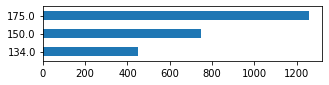

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
134.0    1159
150.0    1713
175.0    2912
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

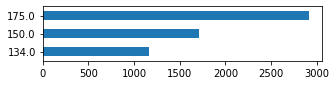

========== NEW FAMILIES - Premium ==========
134.0    165
150.0    225
175.0    371
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

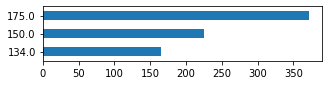

========== NEW FAMILIES - Budget ==========
134.0    309
150.0    425
175.0    763
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

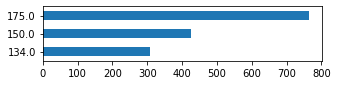

========== NEW FAMILIES - Mainstream ==========
134.0    224
150.0    362
175.0    579
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

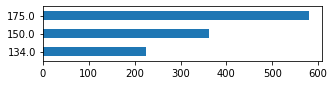

========== OLDER FAMILIES - Premium ==========
134.0    1014
150.0    1607
175.0    2747
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

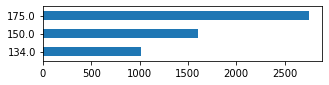

========== OLDER FAMILIES - Budget ==========
134.0    1996
150.0    3414
175.0    5662
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

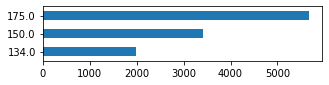

========== OLDER FAMILIES - Mainstream ==========
134.0    1234
150.0    2091
175.0    3489
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

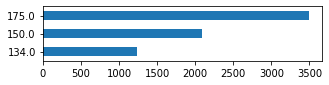

========== OLDER SINGLES/COUPLES - Premium ==========
134.0    1743
150.0    2672
175.0    4380
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

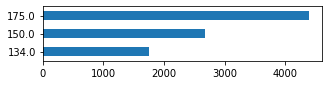

========== OLDER SINGLES/COUPLES - Budget ==========
134.0    1843
150.0    2726
175.0    4535
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

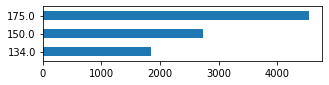

========== OLDER SINGLES/COUPLES - Mainstream ==========
134.0    1720
150.0    2660
175.0    4420
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

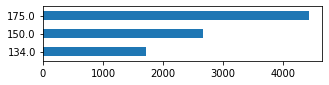

========== RETIREES - Premium ==========
134.0    1330
150.0    1883
175.0    3232
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

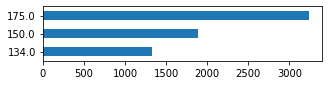

========== RETIREES - Budget ==========
134.0    1517
150.0    2242
175.0    3767
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

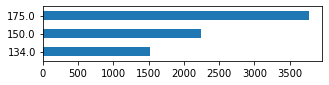

========== RETIREES - Mainstream ==========
134.0    2103
150.0    3183
175.0    5187
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

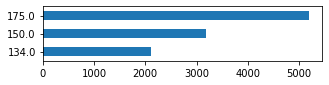

========== YOUNG FAMILIES - Premium ==========
134.0    1007
150.0    1697
175.0    2926
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

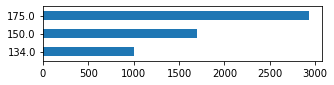

========== YOUNG FAMILIES - Budget ==========
134.0    1674
150.0    2749
175.0    4800
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

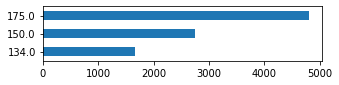

========== YOUNG FAMILIES - Mainstream ==========
134.0    1148
150.0    1927
175.0    3087
Name: pack_sizes, dtype: int64


<Figure size 432x288 with 0 Axes>

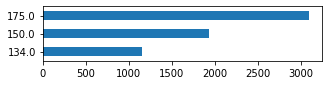

In [103]:
for stage in mdf5["LIFESTAGE"].unique():
    for prem in mdf5["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = mdf5[(mdf5["LIFESTAGE"] == stage) & (mdf5["PREMIUM_CUSTOMER"] == prem)]["pack_sizes"].value_counts().head(3).sort_index()
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

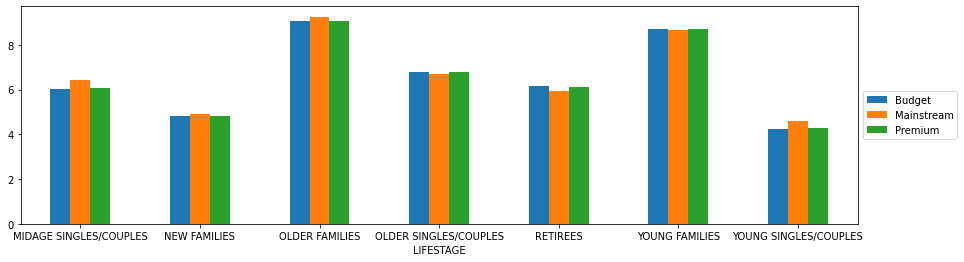

In [104]:
(mdf5.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / mdf5.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("Average purchase quantity per segment.png", bbox_inches="tight")

In [105]:
#Average chips price per transaction by segments
mdf5["Unit_Price"] = mdf5["TOT_SALES"] / mdf5["PROD_QTY"]
mdf5.groupby(["Segment"]).mean()["Unit_Price"].sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Segment
YOUNG SINGLES/COUPLES - Mainstream     4.065633
MIDAGE SINGLES/COUPLES - Mainstream    3.994186
RETIREES - Budget                      3.924371
RETIREES - Premium                     3.920960
NEW FAMILIES - Budget                  3.917688
NEW FAMILIES - Mainstream              3.916133
OLDER SINGLES/COUPLES - Premium        3.893362
OLDER SINGLES/COUPLES - Budget         3.882096
NEW FAMILIES - Premium                 3.872110
RETIREES - Mainstream                  3.844294
OLDER SINGLES/COUPLES - Mainstream     3.814761
MIDAGE SINGLES/COUPLES - Premium       3.770698
YOUNG FAMILIES - Premium               3.762150
YOUNG FAMILIES - Budget                3.760735
OLDER FAMILIES - Budget                3.745310
MIDAGE SINGLES/COUPLES - Budget        3.743328
OLDER FAMILIES - Mainstream            3.737077
YOUNG FAMILIES - Mainstream            3.724594
OLDER FAMILIES - Premium               3.717000
YOUNG SINGLES/COUPLES - Premium        3.665414
YOUNG SINGLES/COUPLES - Budget  

In [106]:
z = mdf5.groupby(["Segment", "Cleaned_Brand_Names"]).sum()["TOT_SALES"].sort_values(ascending=False).reset_index()
z[z["Segment"] == "YOUNG SINGLES/COUPLES - Mainstream"]

Segment Cleaned_Brand_Names  TOT_SALES
0    YOUNG SINGLES/COUPLES - Mainstream              Kettle    35419.0
8    YOUNG SINGLES/COUPLES - Mainstream             Doritos    20925.9
22   YOUNG SINGLES/COUPLES - Mainstream            Pringles    16002.5
24   YOUNG SINGLES/COUPLES - Mainstream              Smiths    14958.9
54   YOUNG SINGLES/COUPLES - Mainstream           Infuzions     8749.4
61   YOUNG SINGLES/COUPLES - Mainstream            Twisties     7539.8
69   YOUNG SINGLES/COUPLES - Mainstream            Tostitos     7238.0
70   YOUNG SINGLES/COUPLES - Mainstream               Thins     7217.1
84   YOUNG SINGLES/COUPLES - Mainstream                Cobs     6144.6
115  YOUNG SINGLES/COUPLES - Mainstream            Tyrrells     4800.6
122  YOUNG SINGLES/COUPLES - Mainstream                 RRD     4509.9
136  YOUNG SINGLES/COUPLES - Mainstream         Grain Waves     4201.0
172  YOUNG SINGLES/COUPLES - Mainstream            Cheezels     3318.3
227  YOUNG SINGLES/COUPLES - Mainstream     Natural Chip Co     2130.0
258  YOUNG SINGLES/COUPLES - Mainstream          Woolworths     1605.8
298  YOUNG SINGLES/COUPLES - Mainstream             Cheetos      898.8
308  YOUNG SINGLES/COUPLES - Mainstream                 CCs      850.5
362  YOUNG SINGLES/COUPLES - Mainstream              French      429.0
371  YOUNG SINGLES/COUPLES - Mainstream            Sunbites      391.0
394  YOUNG SINGLES/COUPLES - Mainstream              Burger      243.8

In [107]:
mdf5.head()

LYLTY_CARD_NBR  TXN_ID               LIFESTAGE PREMIUM_CUSTOMER       DATE  \
0            1000       1   YOUNG SINGLES/COUPLES          Premium 2018-10-17   
1            1307     348  MIDAGE SINGLES/COUPLES           Budget 2019-05-14   
2            1307     346  MIDAGE SINGLES/COUPLES           Budget 2018-11-10   
3            1307     347  MIDAGE SINGLES/COUPLES           Budget 2019-03-09   
4            1343     383  MIDAGE SINGLES/COUPLES           Budget 2019-05-20   

   STORE_NBR  PROD_NBR  PROD_QTY Cleaned_Brand_Names  pack_sizes  TOT_SALES  \
0          1         5         2     Natural Chip Co       175.0        6.0   
1          1        66         3                 CCs       175.0        6.3   
2          1        96         2          Woolworths       160.0        3.8   
3          1        54         1                 CCs       175.0        2.1   
4          1        61         2              Smiths       170.0        2.9   

                           Segment  Unit_Price  
0  YOUNG SINGLES/COUPLES - Premium        3.00  
1  MIDAGE SINGLES/COUPLES - Budget        2.10  
2  MIDAGE SINGLES/COUPLES - Budget        1.90  
3  MIDAGE SINGLES/COUPLES - Budget        2.10  
4  MIDAGE SINGLES/COUPLES - Budget        1.45

In [108]:
mdf7 = mdf5.loc[:,("DATE","Segment","Cleaned_Brand_Names","pack_sizes","PROD_QTY","TOT_SALES")]

In [109]:
mdf7.to_csv("final_data")